# O que são arquivos de áudio?

Muitos de nós já estamos acostumados com a representação de uma onda sonora como uma sequência de "picos e vales"
![Image](https://www.shutterstock.com/image-vector/audio-wave-sound-260nw-683729356.jpg)

Esses picos e vales são formados pelo som "batendo" contra o captador de um microfone:
![Image](https://mynewmicrophone.com/wp-content/uploads/2019/08/mnm_How_Do_Microphone_Transducers_Work.jpg)

Em sua essência, um arquivo de áudio nada mais é do que um **vetor numérico** (lista de números). Cada número representa um pico ou vale capturado pelo microfone. O microfone captura cada um dos picos / vales **milhares de vezes por segundo**, e sua intensidade vira um número no vetor:
![Image](https://www.researchgate.net/publication/369841002/figure/fig2/AS:11431281139013083@1680812982807/Wave-plot-of-speech-audio-file-in-WAV-format.png)

O número de vezes com que o som é capturado a cada segundo é chamado de taxa de amostragem (**sampling rate**)

## Por que um vetor?

Dentro do computador (e especialmente quando falamos de IA e Machine Learning), muitos tipos de dados diferentes como áudio, imagens, vídeos, texto, etc., são representados como vetores. Este é o motivo pelo qual é possível criar modelos de IA que "convertem" as informações que passamos para eles, como text-to-speech.

Para visualizar um arquivo de áudio, iremos utilizar os dados do seguinte DataSet do HuggingFace: https://huggingface.co/datasets/ashraq/esc50

### Carregando o Dataset e exibindo os dados

In [5]:
from datasets import load_dataset
import librosa
import soundfile as sf

dataset = load_dataset('ashraq/esc50')

Repo card metadata block was not found. Setting CardData to empty.


In [6]:
dataset

DatasetDict({
    train: Dataset({
        features: ['filename', 'fold', 'target', 'category', 'esc10', 'src_file', 'take', 'audio'],
        num_rows: 2000
    })
})

In [7]:
data = dataset['train']
data

Dataset({
    features: ['filename', 'fold', 'target', 'category', 'esc10', 'src_file', 'take', 'audio'],
    num_rows: 2000
})

In [9]:
first_line = data[0]
first_line

{'filename': '1-100032-A-0.wav',
 'fold': 1,
 'target': 0,
 'category': 'dog',
 'esc10': True,
 'src_file': 100032,
 'take': 'A',
 'audio': {'path': None,
  'array': array([0., 0., 0., ..., 0., 0., 0.]),
  'sampling_rate': 44100}}

In [10]:
first_lines = data.select(range(10))

In [11]:
for line in first_lines:
    print(line)
    print('\n=====================\n')

{'filename': '1-100032-A-0.wav', 'fold': 1, 'target': 0, 'category': 'dog', 'esc10': True, 'src_file': 100032, 'take': 'A', 'audio': {'path': None, 'array': array([0., 0., 0., ..., 0., 0., 0.]), 'sampling_rate': 44100}}


{'filename': '1-100038-A-14.wav', 'fold': 1, 'target': 14, 'category': 'chirping_birds', 'esc10': False, 'src_file': 100038, 'take': 'A', 'audio': {'path': None, 'array': array([-0.01184082, -0.10336304, -0.14141846, ...,  0.06985474,
        0.04049683,  0.00274658]), 'sampling_rate': 44100}}


{'filename': '1-100210-A-36.wav', 'fold': 1, 'target': 36, 'category': 'vacuum_cleaner', 'esc10': False, 'src_file': 100210, 'take': 'A', 'audio': {'path': None, 'array': array([-0.00695801, -0.01251221, -0.01126099, ...,  0.215271  ,
       -0.00875854, -0.28903198]), 'sampling_rate': 44100}}


{'filename': '1-100210-B-36.wav', 'fold': 1, 'target': 36, 'category': 'vacuum_cleaner', 'esc10': False, 'src_file': 100210, 'take': 'B', 'audio': {'path': None, 'array': array([0.5389

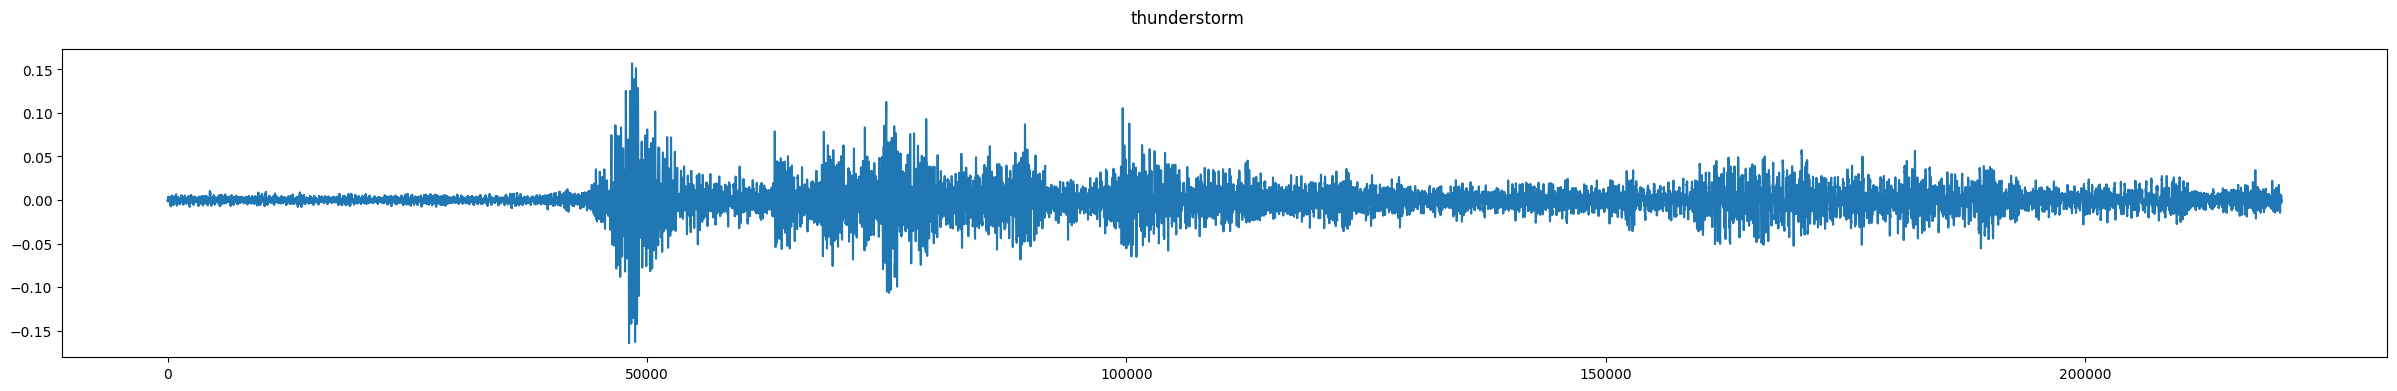

In [14]:
import matplotlib.pyplot as plt

data_index = 5

line = data[data_index]

plt.subplots(figsize=(30, 4))
plt.plot(line['audio']['array'])
plt.suptitle(line['category'])

plt.show()

In [15]:
from pathlib import Path
import IPython

output_folder = Path('audios') / 'objects'
output_folder.mkdir(exist_ok=True, parents=True)

In [17]:
import IPython.display


for i, line in enumerate(first_lines):
    object = line['category']
    data_sound = line['audio']['array']
    sampling_rate = line['audio']['sampling_rate'] # Taxa de amostragem
    
    output_path = output_folder / f'{i}_{object}.wav'
    sf.write(file=output_path, data=data_sound, samplerate=sampling_rate)
    
    display(IPython.display.Audio(data=data_sound, rate=sampling_rate))

In [18]:
from datasets import Audio

sr = data[0]['audio']['sampling_rate']

print('Original sampling rate:', sr)

Original sampling rate: 44100


In [20]:
data = data.cast_column('audio', Audio(sampling_rate=48000))

sr = data[0]['audio']['sampling_rate']

print('Modified sampling rate:', sr)

Modified sampling rate: 48000


## Classificando áudios

Vamos ver agora os dados do Dataset Fleurs, do Google: https://huggingface.co/datasets/google/fleurs

Este dataset contém frases faladas em diferentes línguas, junto de sua transcrição.

São mais de **330 GB** de dados, portando vamos usar o modo de streaming de dados do HuggingFace para não precisar baixar.

In [22]:
from datasets import load_dataset

dataset_name = 'google/fleurs'
dataset_language = 'pt_br'

data = load_dataset(dataset_name, name=dataset_language, split='train', streaming=True, trust_remote_code=True)

In [23]:
data

IterableDataset({
    features: ['id', 'num_samples', 'path', 'audio', 'transcription', 'raw_transcription', 'gender', 'lang_id', 'language', 'lang_group_id'],
    num_shards: 1
})

In [24]:
first_lines = data.take(5)
first_lines

IterableDataset({
    features: ['id', 'num_samples', 'path', 'audio', 'transcription', 'raw_transcription', 'gender', 'lang_id', 'language', 'lang_group_id'],
    num_shards: 1
})

In [37]:
for line in first_lines:
    print(line)
    print('\n\n=====================\n\n')

{'id': 114, 'num_samples': 312960, 'path': None, 'audio': {'path': 'train/10009971053374752024.wav', 'array': array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       9.54866409e-05, 1.48892403e-04, 1.79767609e-04]), 'sampling_rate': 16000}, 'transcription': 'o governo anterior considerado conservador da austrália se negou a ratificar kyoto afirmando que seria ruim para a economia por sua forte dependência das exportações de carvão ao mesmo tempo que alguns países como índia e china não tinham limitações por metas de emissões', 'raw_transcription': 'O governo anterior, considerado conservador, da Austrália se negou a ratificar Kyoto, afirmando que seria ruim para a economia por sua forte dependência das exportações de carvão, ao mesmo tempo que alguns países como Índia e China não tinham limitações por metas de emissões.', 'gender': 0, 'lang_id': 76, 'language': 'Portuguese', 'lang_group_id': 0}




{'id': 916, 'num_samples': 257280, 'path': None, 'audio': {'path': 'train/100

In [38]:
from transformers import pipeline

model = 'sanchit-gandhi/whisper-medium-fleurs-lang-id'
classifier = pipeline('audio-classification', model=model)

Device set to use cpu


In [39]:
classifier

In [40]:
classifier.feature_extractor.sampling_rate

16000

In [43]:
first_line = list(first_lines)[0]

In [44]:
first_line

{'id': 114,
 'num_samples': 312960,
 'path': None,
 'audio': {'path': 'train/10009971053374752024.wav',
  'array': array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         9.54866409e-05, 1.48892403e-04, 1.79767609e-04]),
  'sampling_rate': 16000},
 'transcription': 'o governo anterior considerado conservador da austrália se negou a ratificar kyoto afirmando que seria ruim para a economia por sua forte dependência das exportações de carvão ao mesmo tempo que alguns países como índia e china não tinham limitações por metas de emissões',
 'raw_transcription': 'O governo anterior, considerado conservador, da Austrália se negou a ratificar Kyoto, afirmando que seria ruim para a economia por sua forte dependência das exportações de carvão, ao mesmo tempo que alguns países como Índia e China não tinham limitações por metas de emissões.',
 'gender': 0,
 'lang_id': 76,
 'language': 'Portuguese',
 'lang_group_id': 0}

In [45]:
prediction = classifier(line['audio']['array'])
prediction

[{'score': 0.999987006187439, 'label': 'Portuguese'},
 {'score': 2.1169942101550987e-06, 'label': 'Kabuverdianu'},
 {'score': 1.003450734060607e-06, 'label': 'Persian'},
 {'score': 4.4821106826020696e-07, 'label': 'French'},
 {'score': 4.1828974417512654e-07, 'label': 'Northern-Sotho'}]

In [46]:
from datasets import load_dataset
from transformers import pipeline

dataset_name = 'google/fleurs'
dataset_language = 'en_us'

data = load_dataset(dataset_name, name=dataset_language, split='train', streaming=True, trust_remote_code=True)

model = 'sanchit-gandhi/whisper-medium-fleurs-lang-id'
classifier = pipeline('audio-classification', model=model)

for line in data.take(5):
    prediction = classifier(line['audio']['array'])
    print(prediction)
    print('\n\n=====================\n\n')

Device set to use cpu


[{'score': 0.9999545812606812, 'label': 'English'}, {'score': 2.6251816507283365e-06, 'label': 'Norwegian'}, {'score': 2.016381586145144e-06, 'label': 'Indonesian'}, {'score': 1.8816515421349322e-06, 'label': 'Swahili'}, {'score': 1.5627165339537896e-06, 'label': 'Kazakh'}]




[{'score': 0.9999524354934692, 'label': 'English'}, {'score': 4.006348717666697e-06, 'label': 'Norwegian'}, {'score': 3.452703822404146e-06, 'label': 'Kazakh'}, {'score': 2.4740347726037726e-06, 'label': 'Icelandic'}, {'score': 2.252617150588776e-06, 'label': 'Estonian'}]




[{'score': 0.9999401569366455, 'label': 'English'}, {'score': 2.842946287273662e-06, 'label': 'Kazakh'}, {'score': 2.7181574751011794e-06, 'label': 'Norwegian'}, {'score': 2.3648667593079153e-06, 'label': 'Indonesian'}, {'score': 2.148345856767264e-06, 'label': 'Thai'}]




[{'score': 0.9999455213546753, 'label': 'English'}, {'score': 3.8358075471478514e-06, 'label': 'Kazakh'}, {'score': 2.9356694994930876e-06, 'label': 'Norwegian'}, {'scor

In [13]:
import sounddevice as sd

duration = 10
sampling_rate = 16000
vector_size = int(duration * sampling_rate)

recording = sd.rec(vector_size, samplerate=sampling_rate, channels=1)
sd.wait()

recording

array([[ 0.0000000e+00],
       [ 0.0000000e+00],
       [-3.0517578e-05],
       ...,
       [-1.5258789e-02],
       [-4.0283203e-03],
       [-1.8310547e-03]], dtype=float32)

In [14]:
recording.shape

(160000, 1)

In [15]:
recording = recording.ravel()

In [16]:
recording.shape

(160000,)

In [17]:
import IPython

IPython.display.Audio(data=recording, rate=sampling_rate)

In [18]:
from transformers import pipeline

model = 'sanchit-gandhi/whisper-medium-fleurs-lang-id'
classifier = pipeline('audio-classification', model=model)

Device set to use cpu


In [19]:
classifier(recording)

[{'score': 0.9999386072158813, 'label': 'Portuguese'},
 {'score': 3.528271190589294e-05, 'label': 'Kabuverdianu'},
 {'score': 2.3600371150678257e-06, 'label': 'Persian'},
 {'score': 1.6769101875979686e-06, 'label': 'Welsh'},
 {'score': 1.4368015399668366e-06, 'label': 'Irish'}]

### Outros exemplos de classificação

#### Classificando gênero e idade

Vamos testar com o seguinte modelo, que promete categorizar idade e gênero de uma voz: https://huggingface.co/audeering/wav2vec2-large-robust-24-ft-age-gender

In [35]:
import numpy as np
import torch
import torch.nn as nn
from transformers import Wav2Vec2Processor
from transformers.models.wav2vec2.modeling_wav2vec2 import (
    Wav2Vec2Model,
    Wav2Vec2PreTrainedModel,
)


class ModelHead(nn.Module):
    r"""Classification head."""

    def __init__(self, config, num_labels):

        super().__init__()

        self.dense = nn.Linear(config.hidden_size, config.hidden_size)
        self.dropout = nn.Dropout(config.final_dropout)
        self.out_proj = nn.Linear(config.hidden_size, num_labels)

    def forward(self, features, **kwargs):

        x = features
        x = self.dropout(x)
        x = self.dense(x)
        x = torch.tanh(x)
        x = self.dropout(x)
        x = self.out_proj(x)

        return x


class AgeGenderModel(Wav2Vec2PreTrainedModel):
    r"""Speech emotion classifier."""

    def __init__(self, config):

        super().__init__(config)

        self.config = config
        self.wav2vec2 = Wav2Vec2Model(config)
        self.age = ModelHead(config, 1)
        self.gender = ModelHead(config, 3)
        self.init_weights()

    def forward(
            self,
            input_values,
    ):

        outputs = self.wav2vec2(input_values)
        hidden_states = outputs[0]
        hidden_states = torch.mean(hidden_states, dim=1)
        logits_age = self.age(hidden_states)
        logits_gender = torch.softmax(self.gender(hidden_states), dim=1)

        return hidden_states, logits_age, logits_gender



# load model from hub
device = 'cpu'
model_name = 'audeering/wav2vec2-large-robust-24-ft-age-gender'
processor = Wav2Vec2Processor.from_pretrained(model_name)
model = AgeGenderModel.from_pretrained(model_name)

# dummy signal
sampling_rate = 16000
signal = np.zeros((1, sampling_rate), dtype=np.float32)


def process_func(
    model,
    processor,
    x: np.ndarray,
    sampling_rate: int,
    embeddings: bool = False,
    device: str = 'cpu',
) -> np.ndarray:
    r"""Predict age and gender or extract embeddings from raw audio signal."""

    # run through processor to normalize signal
    # always returns a batch, so we just get the first entry
    # then we put it on the device
    y = processor(x, sampling_rate=sampling_rate)
    y = y['input_values'][0]
    y = y.reshape(1, -1)
    y = torch.from_numpy(y).to(device)

    # run through model
    with torch.no_grad():
        y = model(y)
        if embeddings:
            y = y[0]
        else:
            y = torch.hstack([y[1], y[2]])

    # convert to numpy
    y = y.detach().cpu().numpy()

    return y


print(process_func(model, processor, signal, sampling_rate))
#    Age        female     male       child
# [[ 0.33793038 0.2715511  0.2275236  0.5009253 ]]

print(process_func(model, processor, signal, sampling_rate, embeddings=True))
# Pooled hidden states of last transformer layer
# [[ 0.024444    0.0508722   0.04930823 ...  0.07247854 -0.0697901
#   -0.0170537 ]]


[[0.33793062 0.27155155 0.22752428 0.5009242 ]]
[[ 0.024444    0.05087218  0.04930816 ...  0.07247852 -0.06979004
  -0.01705375]]


In [36]:
model_name = 'audeering/wav2vec2-large-robust-24-ft-age-gender'

processor = Wav2Vec2Processor.from_pretrained(model_name)
model = AgeGenderModel.from_pretrained(model_name)

In [37]:
def exhibits_prediction(prediction):
    age = prediction[0][0] * 100
    prob_female = prediction[0][1] * 100
    prob_male = prediction[0][2] * 100
    prob_child = prediction[0][3] * 100
    
    print(f'Age: {age:.2f}')
    print(f'Inferred person:\n{prob_female:.2f}% Female\n{prob_male:.2f}% Male\n{prob_child:.2f}% Child')

In [38]:
import IPython

for line in data.take(5):
    x = line['audio']['array']
    sampling_rate = line['audio']['sampling_rate']
    prediction = process_func(model=model, processor=processor, x=x, sampling_rate=sampling_rate)
    exhibits_prediction(prediction)
    
    display(IPython.display.Audio(data=x, rate=sampling_rate))

Age: 27.90
Inferred person:
97.66% Female
1.37% Male
0.97% Child


Age: 39.59
Inferred person:
0.51% Female
99.45% Male
0.03% Child


Age: 25.27
Inferred person:
99.43% Female
0.44% Male
0.13% Child


Age: 54.73
Inferred person:
52.67% Female
47.31% Male
0.02% Child


Age: 63.15
Inferred person:
0.07% Female
99.92% Male
0.01% Child


#### Predição com base em áudio gravado localmente

In [ ]:
import sounddevice as sd

duration = 10
sampling_rate = 16000
vector_size = int(duration * sampling_rate)

recording = sd.rec(vector_size, samplerate=sampling_rate, channels=1).ravel()
sd.wait()

In [ ]:
prediction = process_func(model=model, processor=processor, x=recording, sampling_rate=sampling_rate)
exhibits_prediction(prediction)